### Doc csv order_all.csv vao insert vao SQL Server

In [ ]:
import pandas as pd
import pyodbc

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=LAPTOP-UVRSHL4N;' # Server login tai SQL Server
                        'Database=order_all;'
                        'Trusted_Connection=yes;')

# Đường dẫn đến tệp CSV
csv_file = "C:\\Users\\Admin\\Pictures\\SQL\\order_all.csv"

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv(csv_file)

# chuyển đổi cột 'Quantity Ordered' và 'Price Each' thành kiểu số nguyên hoặc số thực
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df = df.dropna(how='all')
df = df[df['Order Date'] != 'Order Date']

# Chèn dữ liệu từ DataFrame vào bảng Orders trong cơ sở dữ liệu
cursor = conn.cursor()
for _, row in df.iterrows():
    query = "INSERT INTO Orders (OrderID, Product, [Quantity Ordered], [Price Each], [Order Date], PurchaseAddress) " \
            "VALUES (?, ?, ?, ?, ?, ?)"
    values = (row['Order ID'], row['Product'], row['Quantity Ordered'], row['Price Each'],
              row['Order Date'], row['Purchase Address'])
    cursor.execute(query, values)

# Lưu các thay đổi và đóng kết nối
cursor.commit()
cursor.close()
conn.close()


### Doc csv order_customer.csv vao insert vao SQL Server

In [ ]:
import pandas as pd
import pyodbc

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=LAPTOP-UVRSHL4N\SQLEXPRESS;' # Server login tai SQL Server
                        'Database=order_all;'
                        'Trusted_Connection=yes;')

# Đường dẫn đến tệp CSV
csv_file = "C:\\Users\\Admin\\Pictures\\sql\\Project\\order_all.csv"

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv(csv_file)

# Chèn dữ liệu từ DataFrame vào bảng Orders trong cơ sở dữ liệu
cursor = conn.cursor()
for _, row in df.iterrows():
    query = "INSERT INTO Order_customer ([Order_ID],[Customer_Key],[Customer_Name],[Email],[Phone]) " \
            "VALUES (?, ?, ?, ?, ?)"
    values = (row['Order ID'], row['Customer Key'], row['Customer Name'], row['Email'], row['Phone'])
    cursor.execute(query, values)

# Lưu các thay đổi và đóng kết nối
cursor.commit()
cursor.close()
conn.close()


### Doc csv order_paymentmethod.csv vao insert vao SQL Server

In [ ]:
import pandas as pd
import pyodbc

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-UVRSHL4N;' # Server login tại SQL Server
                      'Database=IMICDA;'
                      'Trusted_Connection=yes;')

# Đường dẫn đến tệp CSV
csv_file = "order_paymentmethod.csv"

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv(csv_file)

# Chèn dữ liệu từ DataFrame vào bảng Order_paymentmethod trong cơ sở dữ liệu
cursor = conn.cursor()
for _, row in df.iterrows():
    query = "INSERT INTO Order_paymentmethod ([Order_ID],[Payment_Key],[Payment_Method],[Card_Number],[Expiration_Date]) " \
            "VALUES (?, ?, ?, ?, ?)"
    values = (row['Order ID'], row['Payment Key'], row['Payment Method'], row['Card Number'], row['Expiration Date'])
    cursor.execute(query, values)

# Lưu các thay đổi và đóng kết nối
cursor.commit()
cursor.close()
conn.close()

### Lay du lieu tu SQL ra va ve bieu do

In [ ]:
import matplotlib.pyplot as plt
import pyodbc

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-UVRSHL4N;' # Server login tại SQL Server
                      'Database=DA3;'
                      'Trusted_Connection=yes;')

# Truy vấn dữ liệu từ cơ sở dữ liệu
cursor = conn.cursor()
query = "SELECT Month, TotalSale FROM Sales Where Month < 10"
cursor.execute(query)

# Lấy kết quả truy vấn
data = cursor.fetchall()

# Tách dữ liệu thành các danh sách riêng biệt
month = [row.Month for row in data]
totalsale = [row.TotalSale for row in data]

# Tạo biểu đồ cột
plt.bar(month, totalsale)
plt.xlabel('Month')
plt.ylabel('Doanh thu')
plt.title('Bieu do doanh thu theo thang')
plt.show()

# Đóng kết nối cơ sở dữ liệu
conn.close()


In [ ]:
import matplotlib.pyplot as plt
import pyodbc

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-UVRSHL4N;' # Server login tại SQL Server
                      'Database=DA3;'
                      'Trusted_Connection=yes;')

# Truy vấn dữ liệu từ cơ sở dữ liệu
cursor = conn.cursor()
query = "SELECT Month, TotalSale, TotalOrder FROM Sales ORDER BY Month ASC"
cursor.execute(query)

# Lấy kết quả truy vấn
data = cursor.fetchall()

# Tách dữ liệu thành các danh sách riêng biệt
month = [row.Month for row in data]
totalsale = [row.TotalSale for row in data]
totalorder = [row.TotalOrder for row in data]

# Xác định các vị trí x cho các cột và đường
x = month
width = 0.4

# Tạo đối tượng Figure và trục chính
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột doanh thu
ax1.bar(x, totalsale, width, label='Doanh thu')
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh thu')
ax1.tick_params(axis='y')

# Tạo trục thứ hai
ax2 = ax1.twinx()

# Vẽ biểu đồ đường số đơn hàng
ax2.scatter(x, totalorder, color='red', marker='o', linestyle='-', label='Số đơn hàng')
ax2.set_ylabel('Số đơn hàng')
ax2.tick_params(axis='y')

# Tạo chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Đặt tên cho biểu đồ
plt.title('Biểu đồ doanh thu và số đơn hàng theo tháng')

# Thêm văn bản trên các cột
for i, v in enumerate(totalsale):
    ax1.text(i + 1, v, f'{v:,.0f}', ha='center', va='bottom')

for i, v in enumerate(totalorder):
    ax2.text(i + 1, v, f'{v:,.0f}', ha='center', va='bottom')

# Tạo biểu đồ tròn phần trăm doanh thu theo tháng
ax3 = plt.axes([0.9, 0.9, 0.5, 0.5])
ax3.pie(totalsale, labels=x, autopct='%1.1f%%')
ax3.set_title('Phần trăm doanh thu')

# Hiển thị biểu đồ
plt.show()

# Đóng kết nối cơ sở dữ liệu
conn.close()


In [ ]:
import matplotlib.pyplot as plt
import pyodbc
import matplotlib.ticker as mticker

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-UVRSHL4N;' # Server login tại SQL Server
                      'Database=DA3;'
                      'Trusted_Connection=yes;')

# Truy vấn dữ liệu từ cơ sở dữ liệu
cursor = conn.cursor()
query = "SELECT Month, TotalSale, TotalOrder FROM Sales ORDER BY Month ASC"
cursor.execute(query)

# Lấy kết quả truy vấn
data = cursor.fetchall()

# Tách dữ liệu thành các danh sách riêng biệt
month = [row.Month for row in data]
totalsale = [row.TotalSale / 1000000 for row in data]  # Chia cho 1 triệu để hiển thị theo triệu
totalorder = [row.TotalOrder for row in data]

# Xác định các vị trí x cho các cột và đường
x = month
width = 0.4

# Tạo đối tượng Figure và trục chính
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột doanh thu
ax1.bar(x, totalsale, width, label='Doanh thu')
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh thu (triệu)')
ax1.tick_params(axis='y')

# Định dạng đơn vị triệu trên trục Y1
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}M'))

# Tạo trục thứ hai
ax2 = ax1.twinx()

# Vẽ biểu đồ đường số đơn hàng
ax2.scatter(x, totalorder, color='red', marker='o', linestyle='-', label='Số đơn hàng')
ax2.set_ylabel('Số đơn hàng')
ax2.tick_params(axis='y')

# Tạo chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Đặt tên cho biểu đồ
plt.title('Biểu đồ doanh thu và số đơn hàng theo tháng')

# Thêm văn bản trên các cột
for i, v in enumerate(totalsale):
    ax1.text(i + 1, v, f'{v:,.2f}', ha='center', va='bottom')

for i, v in enumerate(totalorder):
    ax2.text(i + 1, v, f'{v:,.0f}', ha='center', va='bottom')

# Tạo biểu đồ tròn phần trăm doanh thu theo tháng
ax3 = plt.axes([0.9, 0.9, 0.5, 0.5])
ax3.pie(totalsale, labels=x, autopct='%1.1f%%')
ax3.set_title('Phần trăm doanh thu')

# Hiển thị biểu đồ
plt.show()

# Đóng kết nối cơ sở dữ liệu
conn.close()


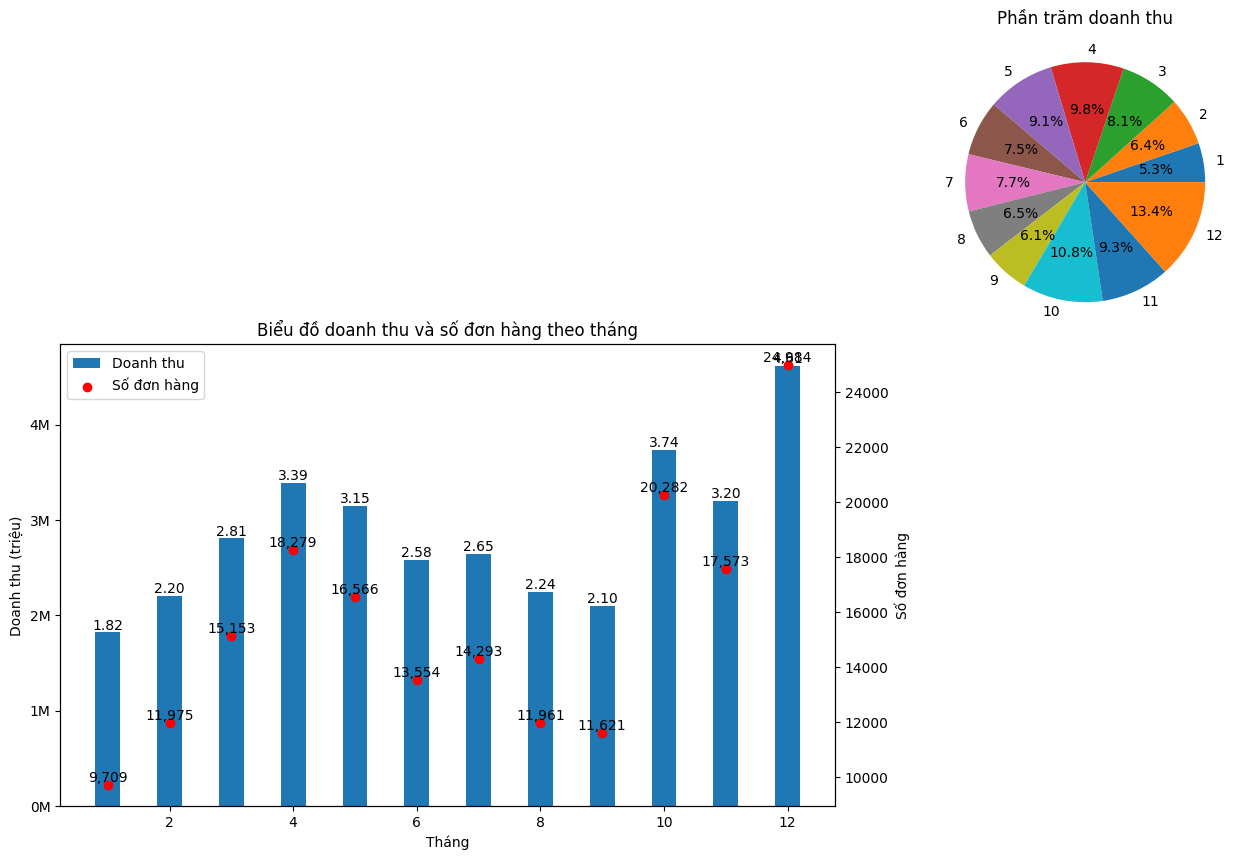

In [25]:
import matplotlib.pyplot as plt
import pyodbc
import matplotlib.ticker as mticker

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-UVRSHL4N;' # Server login tại SQL Server
                      'Database=DA3;'
                      'Trusted_Connection=yes;')

# Truy vấn dữ liệu từ cơ sở dữ liệu
cursor = conn.cursor()
query = "EXEC ProcSales"
cursor.execute(query)

# Lấy kết quả truy vấn
data = cursor.fetchall()

# Tách dữ liệu thành các danh sách riêng biệt
month = [row.Month for row in data]
totalsale = [row.TotalSale / 1000000 for row in data]  # Chia cho 1 triệu để hiển thị theo triệu
totalorder = [row.TotalOrder for row in data]

# Xác định các vị trí x cho các cột và đường
x = month
width = 0.4

# Tạo đối tượng Figure và trục chính
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột doanh thu
ax1.bar(x, totalsale, width, label='Doanh thu')
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh thu (triệu)')
ax1.tick_params(axis='y')

# Định dạng đơn vị triệu trên trục Y1
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}M'))

# Tạo trục thứ hai
ax2 = ax1.twinx()

# Vẽ biểu đồ đường số đơn hàng
ax2.scatter(x, totalorder, color='red', marker='o', linestyle='-', label='Số đơn hàng')
ax2.set_ylabel('Số đơn hàng')
ax2.tick_params(axis='y')

# Tạo chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Đặt tên cho biểu đồ
plt.title('Biểu đồ doanh thu và số đơn hàng theo tháng')

# Thêm văn bản trên các cột
for i, v in enumerate(totalsale):
    ax1.text(i + 1, v, f'{v:,.2f}', ha='center', va='bottom')

for i, v in enumerate(totalorder):
    ax2.text(i + 1, v, f'{v:,.0f}', ha='center', va='bottom')

# Tạo biểu đồ tròn phần trăm doanh thu theo tháng
ax3 = plt.axes([0.9, 0.9, 0.5, 0.5])
ax3.pie(totalsale, labels=x, autopct='%1.1f%%')
ax3.set_title('Phần trăm doanh thu')

# Hiển thị biểu đồ
plt.show()

# Đóng kết nối cơ sở dữ liệu
conn.close()


### Viet Python de goi thu tuc ProcSalesMonth, voi tham so dau vao la @Month

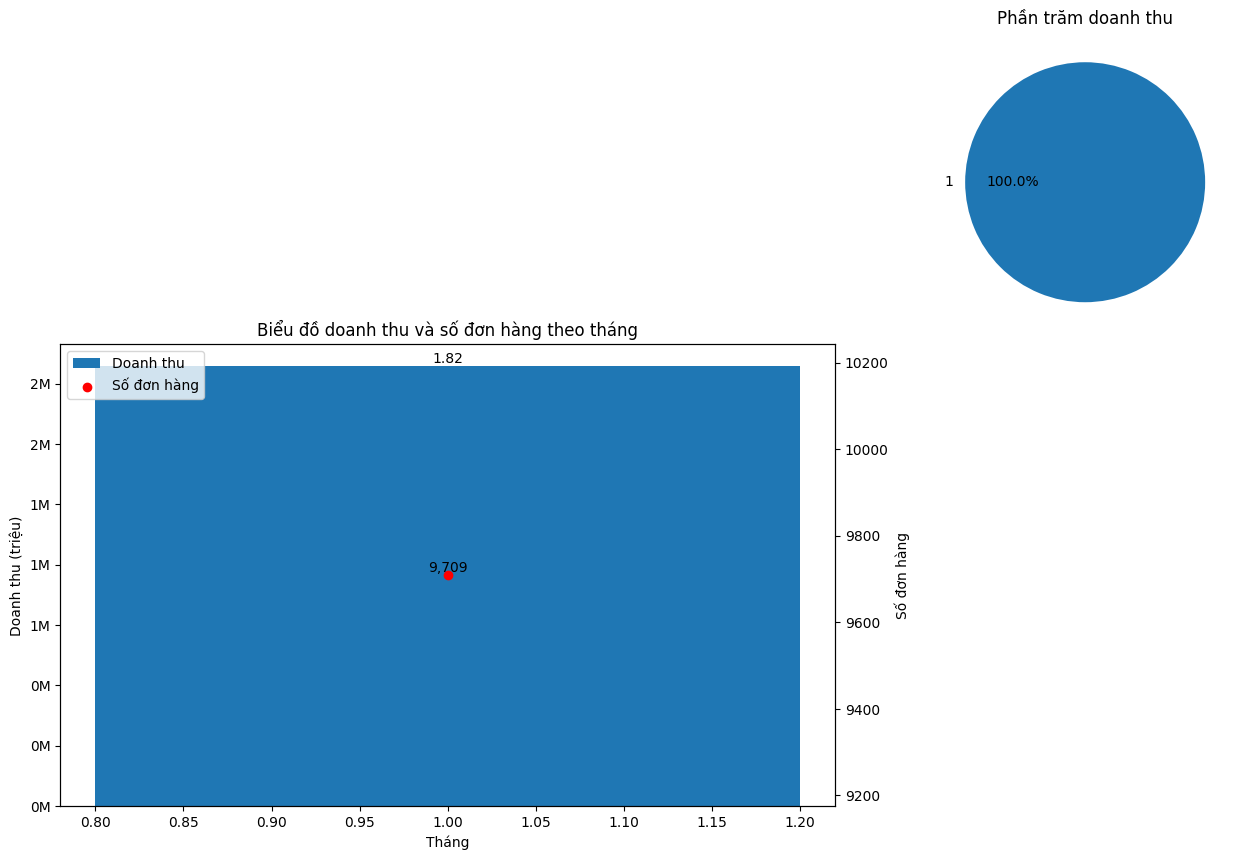

In [5]:
import matplotlib.pyplot as plt
import pyodbc
import matplotlib.ticker as mticker

# Kết nối cơ sở dữ liệu SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-LC684O5;' # Server login tại SQL Server
                      'Database=DA3;'
                      'Trusted_Connection=yes;')

# Truy vấn dữ liệu từ cơ sở dữ liệu
cursor = conn.cursor()
query = "EXEC ProcSalesMonth ?"
cursor.execute(query, 1)

# Lấy kết quả truy vấn
data = cursor.fetchall()

# Tách dữ liệu thành các danh sách riêng biệt
month = [row.Month for row in data]
totalsale = [row.TotalSale / 1000000 for row in data]  # Chia cho 1 triệu để hiển thị theo triệu
totalorder = [row.TotalOrder for row in data]

# Xác định các vị trí x cho các cột và đường
x = month
width = 0.4

# Tạo đối tượng Figure và trục chính
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột doanh thu
ax1.bar(x, totalsale, width, label='Doanh thu')
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh thu (triệu)')
ax1.tick_params(axis='y')

# Định dạng đơn vị triệu trên trục Y1
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}M'))

# Tạo trục thứ hai
ax2 = ax1.twinx()

# Vẽ biểu đồ đường số đơn hàng
ax2.scatter(x, totalorder, color='red', marker='o', linestyle='-', label='Số đơn hàng')
ax2.set_ylabel('Số đơn hàng')
ax2.tick_params(axis='y')

# Tạo chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Đặt tên cho biểu đồ
plt.title('Biểu đồ doanh thu và số đơn hàng theo tháng')

# Thêm văn bản trên các cột
for i, v in enumerate(totalsale):
    ax1.text(i + 1, v, f'{v:,.2f}', ha='center', va='bottom')

for i, v in enumerate(totalorder):
    ax2.text(i + 1, v, f'{v:,.0f}', ha='center', va='bottom')

# Tạo biểu đồ tròn phần trăm doanh thu theo tháng
ax3 = plt.axes([0.9, 0.9, 0.5, 0.5])
ax3.pie(totalsale, labels=x, autopct='%1.1f%%')
ax3.set_title('Phần trăm doanh thu')

# Hiển thị biểu đồ
plt.show()

# Đóng kết nối cơ sở dữ liệu
conn.close()
